##**INTRODUCTION**

The purpose of this project is to analyse the 2023 World Happiness Report to understand which factors in the dataset correlate most with a country's happiness score. I will also combine the data with other country datasets to recognise other trends such as geography and their correlation with happiness scores.

The World Happiness Report is an annual report conducted by the Gallup World Poll that asks more than 100,000 people in 124 countries questions, including 'their perception of corruption in their country', and 'their freedom to make life choices', and assesses the happiness score of each country. The year 2023 marks the 11th year of the survey.


<a id='1'></a>
##**Importing Libraries**

In [44]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



##**Data Importing**

In [287]:
# Read data
data = pd.read_csv('WHR2023.csv')
world_data = pd.read_csv('world-data-2023.csv')
mapping_country = pd.read_csv('continents2.csv')


<a id='2'></a>

##**Understanding the data**

In [145]:
data.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [285]:
world_data.head()

,Country Name,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,NaN,33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,NaN,41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,NaN,28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,NaN,42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,NaN,-11.202692,17.873887


In [286]:
mapping_country.head()


,Country Name,alpha-2,alpha-3,country-code,iso_3166-2,Region,Sub Region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


##**Merge Dataset & Data Cleaning**

In [288]:
# Change column names to match the main dataset
data.rename(columns={'Country name' : 'Country Name'}, inplace=True)
mapping_country.rename(columns={'name' : 'Country Name', 'region' : 'Region', 'sub-region' : 'Sub Region'}, inplace=True)

## Merge data
merged_data = data.merge(mapping_country[['Country Name', 'Region', 'Sub Region']], on='Country Name', how='left')


In [289]:
merged_data

,Country Name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Region,Sub Region
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,...,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,Europe,Northern Europe
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,...,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,Europe,Northern Europe
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,...,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,Europe,Northern Europe
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,...,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,Asia,Western Asia
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,...,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,...,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162,NaN,NaN
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,...,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905,Africa,Sub-Saharan Africa
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,...,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221,Africa,Sub-Saharan Africa
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,...,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110,Asia,Western Asia


In [290]:
# change column order
column_order = ['Country Name', 'Region', 'Sub Region'] + [col for col in merged_data.columns if col not in ['Country Name', 'Region', 'Sub Region']]
merged_data = merged_data[column_order]
# show data
merged_data.head()


,Country Name,Region,Sub Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Europe,Northern Europe,7.804,0.036,7.875,7.733,10.792,0.969,71.150,...,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,Europe,Northern Europe,7.586,0.041,7.667,7.506,10.962,0.954,71.250,...,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,Europe,Northern Europe,7.530,0.049,7.625,7.434,10.896,0.983,72.050,...,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,Asia,Western Asia,7.473,0.032,7.535,7.411,10.639,0.943,72.697,...,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,Europe,Western Europe,7.403,0.029,7.460,7.346,10.942,0.930,71.550,...,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [291]:
## Change name columns world_data
world_data.rename(columns={'Country' : 'Country Name'}, inplace=True)
## merge data
full_data = merged_data.merge(world_data[['Country Name', 'Unemployment rate', 'Urban_population', 'Population', 'Official language']], on='Country Name')

In [292]:
full_data

,Country Name,Region,Sub Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unemployment rate,Urban_population,Population,Official language
0,Finland,Europe,Northern Europe,7.804,0.036,7.875,7.733,10.792,0.969,71.150,...,1.585,0.535,0.772,0.126,0.535,2.363,6.59%,"4,716,888","5,520,314",Swedish
1,Denmark,Europe,Northern Europe,7.586,0.041,7.667,7.506,10.962,0.954,71.250,...,1.548,0.537,0.734,0.208,0.525,2.084,4.91%,"5,119,978","5,818,553",Danish
2,Iceland,Europe,Northern Europe,7.530,0.049,7.625,7.434,10.896,0.983,72.050,...,1.620,0.559,0.738,0.250,0.187,2.250,2.84%,"339,110","361,313",Icelandic
3,Israel,Asia,Western Asia,7.473,0.032,7.535,7.411,10.639,0.943,72.697,...,1.521,0.577,0.569,0.124,0.158,2.691,3.86%,"8,374,393","9,053,300",Hebrew
4,Netherlands,Europe,Western Europe,7.403,0.029,7.460,7.346,10.942,0.930,71.550,...,1.488,0.545,0.672,0.251,0.394,2.110,3.20%,"15,924,729","17,332,850",Dutch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Botswana,Africa,Sub-Saharan Africa,3.435,0.136,3.702,3.168,9.629,0.753,54.725,...,1.041,0.087,0.480,0.021,0.071,0.264,18.19%,"1,616,550","2,346,179",English
123,Zimbabwe,Africa,Sub-Saharan Africa,3.204,0.061,3.323,3.084,7.641,0.690,54.050,...,0.881,0.069,0.363,0.112,0.117,0.905,4.95%,"4,717,305","14,645,468",Shona
124,Sierra Leone,Africa,Sub-Saharan Africa,3.138,0.082,3.299,2.976,7.394,0.555,54.900,...,0.540,0.092,0.371,0.193,0.051,1.221,4.43%,"3,319,366","7,813,215",English
125,Lebanon,Asia,Western Asia,2.392,0.044,2.479,2.305,9.478,0.530,66.149,...,0.476,0.398,0.123,0.061,0.027,-0.110,6.23%,"6,084,994","6,855,713",Arabic


In [293]:
full_data.isnull().sum()

Country Name                                  0
Region                                        3
Sub Region                                    3
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                     

In [202]:
full_data['Sub Region'].unique()

array(['Northern Europe', 'Western Asia', 'Western Europe',
       'Australia and New Zealand', 'Northern America', 'Southern Europe',
       'Latin America and the Caribbean', 'Eastern Europe',
       'South-eastern Asia', 'Central Asia', 'Eastern Asia',
       'Sub-Saharan Africa', nan, 'Southern Asia', 'Northern Africa'],
      dtype=object)

In [295]:
full_data['Region'].unique()

array(['Europe', 'Asia', 'Oceania', 'Americas', 'Africa', nan],
      dtype=object)

In [296]:
full_data[full_data.isna().any(axis=1)]

,Country Name,Region,Sub Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unemployment rate,Urban_population,Population,Official language
66,Bosnia and Herzegovina,NaN,NaN,5.633,0.073,5.775,5.490,9.616,0.880,67.275,...,1.361,0.429,0.485,0.247,0.008,1.635,18.42%,"1,605,144","3,301,000",Bosnian
80,North Macedonia,NaN,NaN,5.254,0.055,5.361,5.146,9.703,0.805,66.500,...,1.171,0.408,0.515,0.207,0.020,1.435,NaN,NaN,"1,836,713",Macedonian
86,Ivory Coast,NaN,NaN,5.053,0.074,5.198,4.907,8.576,0.572,55.953,...,0.584,0.120,0.467,0.138,0.131,2.519,3.32%,"13,176,900","25,716,544",French


there is empty data, then we will fill it in manually

In [297]:
## Manually updating region, sub_region and iso code for Boznia
full_data.loc[66,'Region'] = 'Europe'
full_data.loc[66,'Sub Region'] = 'Southern Europe'

## Manually updating region, sub_region and iso code for North Macedonia
full_data.loc[80,'Region'] = 'Europe'
full_data.loc[80,'Sub Region'] = 'Southern Europe'
full_data.loc[80, 'Unemployment rate'] = 13.2 #based on google information
full_data.loc[80, 'Urban_population'] = 1242855 #based on google information

## Manually updating region, sub_region and iso code for Ivary Coast
full_data.loc[86,'Region'] = 'Africa'
full_data.loc[86,'Sub Region'] = 'Sub-Saharan Africa'





In [299]:
full_data.isnull().sum()

Country Name                                  0
Region                                        0
Sub Region                                    0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                     

In [300]:
full_data.head()

,Country Name,Region,Sub Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unemployment rate,Urban_population,Population,Official language
0,Finland,Europe,Northern Europe,7.804,0.036,7.875,7.733,10.792,0.969,71.150,...,1.585,0.535,0.772,0.126,0.535,2.363,6.59%,"4,716,888","5,520,314",Swedish
1,Denmark,Europe,Northern Europe,7.586,0.041,7.667,7.506,10.962,0.954,71.250,...,1.548,0.537,0.734,0.208,0.525,2.084,4.91%,"5,119,978","5,818,553",Danish
2,Iceland,Europe,Northern Europe,7.530,0.049,7.625,7.434,10.896,0.983,72.050,...,1.620,0.559,0.738,0.250,0.187,2.250,2.84%,"339,110","361,313",Icelandic
3,Israel,Asia,Western Asia,7.473,0.032,7.535,7.411,10.639,0.943,72.697,...,1.521,0.577,0.569,0.124,0.158,2.691,3.86%,"8,374,393","9,053,300",Hebrew
4,Netherlands,Europe,Western Europe,7.403,0.029,7.460,7.346,10.942,0.930,71.550,...,1.488,0.545,0.672,0.251,0.394,2.110,3.20%,"15,924,729","17,332,850",Dutch


In [301]:
#create a new column urban population percentage
full_data['Urban_population'] = full_data['Urban_population'].str.replace(',', '').astype(float)
full_data['Population'] = full_data['Population'].str.replace(',', '').astype(float)
full_data['Urban_population_percentage'] = (full_data['Urban_population'] / full_data['Population']) * 100
full_data.head()

,Country Name,Region,Sub Region,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Unemployment rate,Urban_population,Population,Official language,Urban_population_percentage
0,Finland,Europe,Northern Europe,7.804,0.036,7.875,7.733,10.792,0.969,71.150,...,0.535,0.772,0.126,0.535,2.363,6.59%,4716888.0,5520314.0,Swedish,85.446009
1,Denmark,Europe,Northern Europe,7.586,0.041,7.667,7.506,10.962,0.954,71.250,...,0.537,0.734,0.208,0.525,2.084,4.91%,5119978.0,5818553.0,Danish,87.994008
2,Iceland,Europe,Northern Europe,7.530,0.049,7.625,7.434,10.896,0.983,72.050,...,0.559,0.738,0.250,0.187,2.250,2.84%,339110.0,361313.0,Icelandic,93.854912
3,Israel,Asia,Western Asia,7.473,0.032,7.535,7.411,10.639,0.943,72.697,...,0.577,0.569,0.124,0.158,2.691,3.86%,8374393.0,9053300.0,Hebrew,92.501000
4,Netherlands,Europe,Western Europe,7.403,0.029,7.460,7.346,10.942,0.930,71.550,...,0.545,0.672,0.251,0.394,2.110,3.20%,15924729.0,17332850.0,Dutch,91.875998


In [309]:
# Remove the % sign from'Unemployment rate'
full_data['Unemployment rate'] = full_data['Unemployment rate'].str.replace('%', '')
full_data['Unemployment rate'] = full_data['Unemployment rate'].astype(float)

In [303]:
full_data.duplicated().sum()

0

<a id='4'></a>
##**Data Analysis**

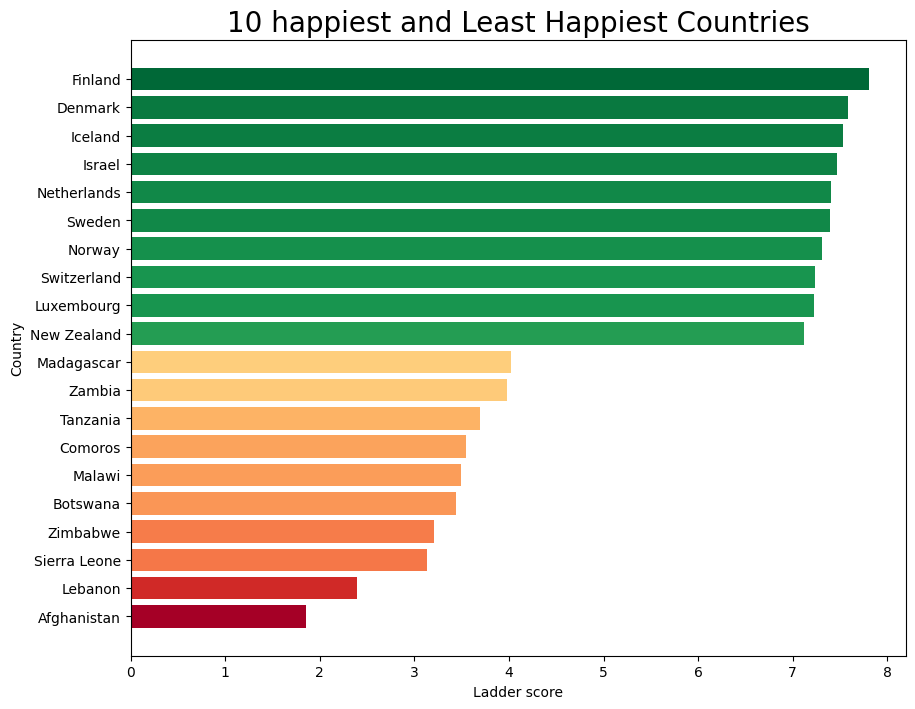

In [363]:
top10 = full_data.set_index('Country Name')['Ladder score'].nlargest(10).to_frame()
bottom10 = full_data.set_index('Country Name')['Ladder score'].nsmallest(10).to_frame()
dfconcat = pd.concat([top10, bottom10], axis=0)
dfconcat = dfconcat.sort_values(by="Ladder score")

fig = plt.figure(figsize=(10,8))
cmap = plt.cm.RdYlGn
norm = plt.Normalize(vmin=dfconcat['Ladder score'].min(), vmax=dfconcat['Ladder score'].max())
colors = [cmap(norm(value)) for value in dfconcat['Ladder score']]

g = plt.barh(y=dfconcat.index, width=dfconcat["Ladder score"], color= colors)
plt.ylabel("Country")
plt.xlabel("Ladder score")
plt.title("10 happiest and Least Happiest Countries", fontsize = 20)

plt.show()

In [362]:
low_score = full_data.sort_values(by='Ladder score').head(10)
country_lowscore = low_score[['Country Name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Unemployment rate']]
country_lowscore

,Country Name,Ladder score,Logged GDP per capita,Social support,Unemployment rate
126,Afghanistan,1.859,7.324,0.341,11.12
125,Lebanon,2.392,9.478,0.530,6.23
124,Sierra Leone,3.138,7.394,0.555,4.43
123,Zimbabwe,3.204,7.641,0.690,4.95
122,Botswana,3.435,9.629,0.753,18.19
121,Malawi,3.495,7.302,0.531,5.65
120,Comoros,3.545,8.075,0.471,4.34
119,Tanzania,3.694,7.857,0.653,1.98
118,Zambia,3.982,8.074,0.694,11.43
117,Madagascar,4.019,7.290,0.650,1.76


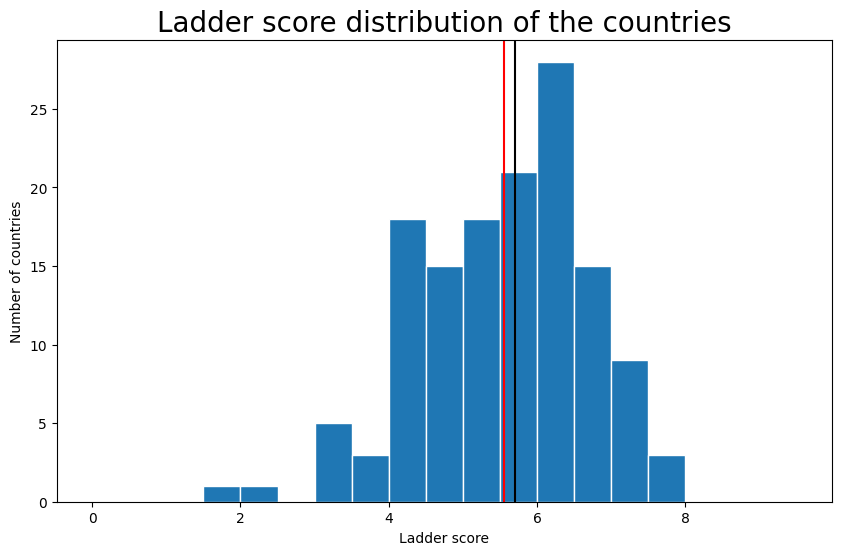

In [306]:
plt.figure(figsize=(10,6))
plt.title("Ladder score distribution of the countries", fontsize = 20)
plt.xlabel('Ladder score')
plt.ylabel('Number of countries')
plt.hist(data_region.happiness_score, bins = np.arange(0,10,0.5), edgecolor = 'white')

plt.axvline(x = full_data['Ladder score'].mean(), color = 'red')
plt.axvline(x = full_data['Ladder score'].median(), color = 'black')

It can be observed that the mean (red line) and median (black line) are similar, indicating that happiness scores have a fairly symmetrical distribution with a slight skew to the left.

##**How Ladder Score affects other variables?**


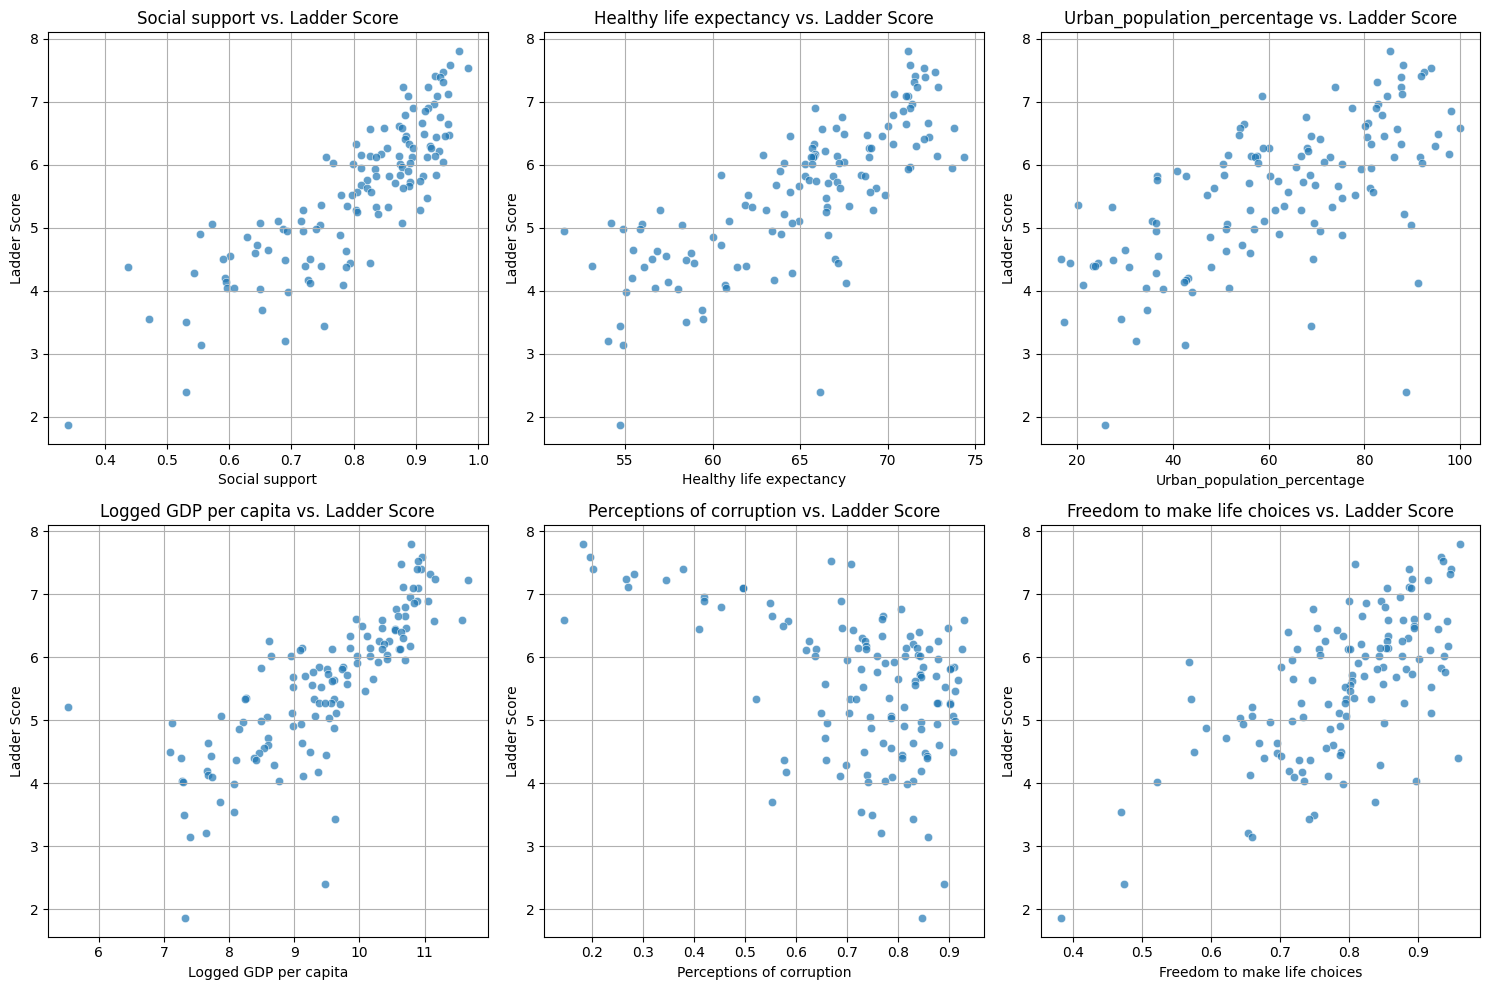

In [276]:
columns_to_analyse = [
    'Social support',
    'Healthy life expectancy',
    'Urban_population_percentage',
    'Logged GDP per capita',
    'Perceptions of corruption',
    'Freedom to make life choices']

#scatterplot the correlation
num_cols = 3
num_rows = 2

# Create a grid of scatter plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over the columns and create scatter plots
for i, column in enumerate(columns_to_analyse):
    sns.scatterplot(data=full_data, x=column, y='Ladder score', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{column} vs. Ladder Score')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Ladder Score')
    axes[i].grid(True)

# Adjust spacing and layout
plt.tight_layout()

# Show the plot
plt.show()

From the visualisation results, information can be obtained about the linear relationship between the Ladder score and the variables tested. The following is a potential analysis of the visualisation results.

1. A positive correlation between Ladder Score and Social Support indicates that the higher the level of social support, the higher the happiness score.

2. Positive correlation between Healthy Life Expectancy and Ladder Score. Indicating that the higher the healthy life expectancy, the higher the happiness score.

3. Urban Population Percentage and Ladder Score show a strong positive correlation. Implying that the higher the urban population percentage, the higher the happiness score.

4. Logged GDP per Capita also shows a positive correlation, implying that the higher the GDP per capita, the higher the happiness score.

5. Perceptions of Corruption and Ladder Score have a negative correlation. This means that the lower the perception of corruption, the higher the happiness score.

6. Freedom to Make Life Choices is positively correlated to Ladder Score.
Indicates that the higher the level of freedom to make life choices, the higher the happiness score.

Therefore, the correlation results provide a strong indication that these variables contribute significantly to the level of happiness as measured by the ladder score. While correlations can provide information about linear relationships, it is important to remember that correlations do not necessarily indicate causality. Other factors beyond these variables can also influence human happiness.

##**GDP and Urban Population Percentage have a relationship?**

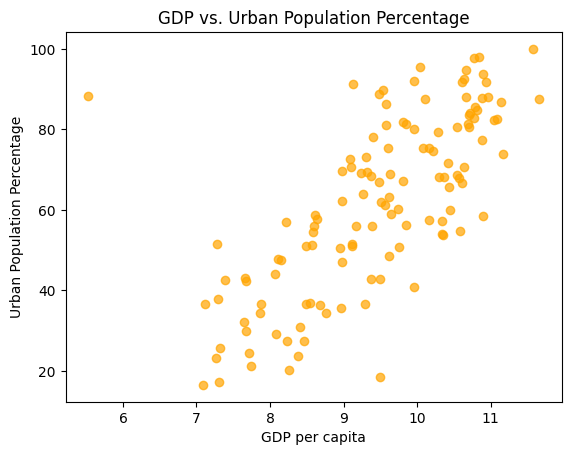

In [278]:
plt.scatter(
    full_data['Logged GDP per capita'],
    full_data['Urban_population_percentage'],
    label='Urban Population Percentage',
    alpha=0.7,
    color='orange')

# Adding labels and title
plt.xlabel('GDP per capita')
plt.ylabel('Urban Population Percentage')
plt.title('GDP vs. Urban Population Percentage')

plt.show()

The visualisation between 'Logged GDP per capita' and 'Urban_population_percentage' shows a strong positive correlation between the two variables. In this context, it means that the higher the 'Logged GDP per capita', the higher the urban population percentage is likely to be.

##**How is the average Ladder score per region?**

In [332]:
mean_happiness = full_data.groupby('Region')[['Ladder score']].mean()
mean_happiness = mean_happiness.sort_values(by=['Ladder score'], ascending=False)

mean_happiness

,Ladder score
Region,
Oceania,7.109000
Europe,6.457167
Americas,6.057619
Asia,5.295765
Africa,4.434353


[Text(0.5, 0, 'Happiness Score'), Text(0, 0.5, 'Region')]

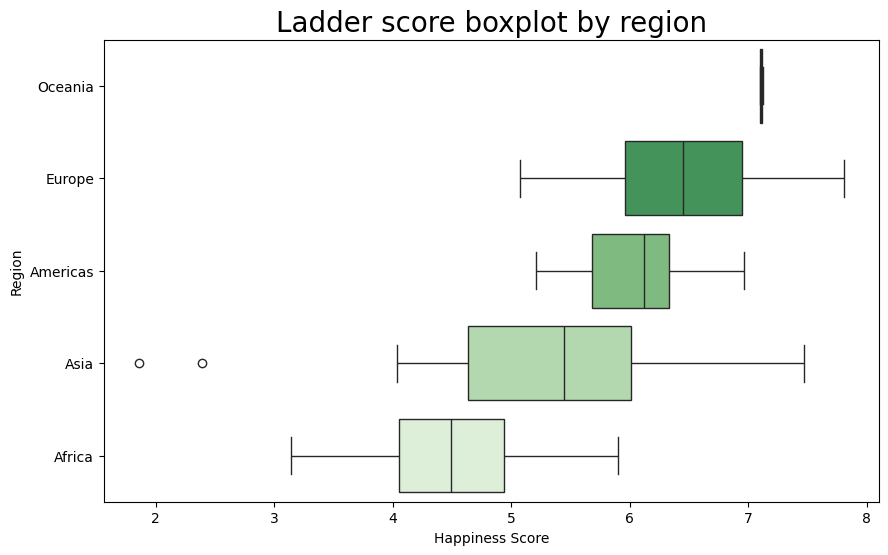

In [335]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Ladder score boxplot by region", fontsize = 20)
sns.boxplot(y="Region", x="Ladder score", data = full_data, orient="h", ax=ax, palette='Greens_r', order=["Oceania", "Europe", "Americas", "Asia", "Africa"] ).set(
    xlabel='Happiness Score',
    ylabel='Region'
)

In [343]:
# Define custom colors for the color scale
custom_color_scale = [
    (0.0, "red"),    # Low scores in red
    (0.5, "orange"), # Medium scores in orange
    (1.0, "green")   # High scores in green
]

fig = px.choropleth(full_data, locations="Country Name", locationmode='country names',
                    color="Ladder score", hover_name="Country Name",
                    title="World Happiness Report: Ladder score by country",
                    color_continuous_scale=custom_color_scale)

fig.show()

<a id='5'></a>

##**Conclusion**

**Economic Growth and Development:**

Countries with the highest happiness scores, such as Finland, Denmark, and Iceland, tend to have high levels of economic growth and good social development. High GDP per capita (Logged GDP per Capita) has a positive impact on happiness.

**Social and Community Support:**

The level of social support is positively correlated with happiness. Countries with strong welfare and social support systems, such as in Europe, tend to have higher happiness scores.

**Health and Life Expectancy:**

Countries with high life expectancy and good access to healthcare have higher happiness scores.

**Urbanisation and Modernisation:**

A high percentage of urbanised population is positively correlated with happiness. This may be due to better access to education, employment and urban amenities.

**Individual Freedom:**

Freedom to make life choices plays an important role in increasing happiness levels. Countries that provide greater individual freedom tend to have higher happiness scores.

**Trust in Leadership and Lack of Corruption:**

Positive perspectives on justice, lack of corruption, and level of freedom from corruption (Perceptions of Corruption) are positively correlated with happiness.



In general, low Ladder scores can result from a number of complex and diverse factors, including economic, social, political and environmental issues.
Such as in Afghanistan, which experiences low levels of economic well-being. Afghanistan faces significant economic challenges with low GDP per capita, which is a major factor in low happiness scores. Another possible contributing factor is that armed conflict and political instability create economic uncertainty and difficulties, which are harmful to emotional well-being. Similarly, in Lebanon, the economic and financial crisis in Lebanon created significant economic and social stress, negatively impacting happiness. Another factor is Lebanon's high unemployment rate. Despite having a high GDP per capita, high unemployment rates can create economic uncertainty and affect perceptions of happiness.

These factors are interrelated and create an enabling environment for a meaningful life. A balance between economic growth, social support, health, planned urbanisation, individual freedom, and trust in the government system, unemployment rates are key in creating high happiness levels in a country.